# Import Libraries

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from google.colab.patches import cv2_imshow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Concatenate x_test with x_train
X = np.concatenate((x_train, x_test), axis=0)

# Concatenate y_test with y_train
y = np.concatenate((y_train, y_test), axis=0)

# Check the shape of concatenated data
print("Shape of concatenated_x:", X.shape)
print("Shape of concatenated_y:", y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of concatenated_x: (70000, 28, 28)
Shape of concatenated_y: (70000,)


In [ ]:
# Select one image from the dataset
image_index = 150  # Change this index to select a different image
image = X[image_index]

In [ ]:
# Resize image to width 400 while preserving aspect ratio
new_width = 400
aspect_ratio = image.shape[1] / image.shape[0]
new_height = int(new_width / aspect_ratio)
resized_image = cv2.resize(image, (new_width, new_height))
# Threshold the resized image
_, thresholded_image = cv2.threshold(resized_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)   # Boundary

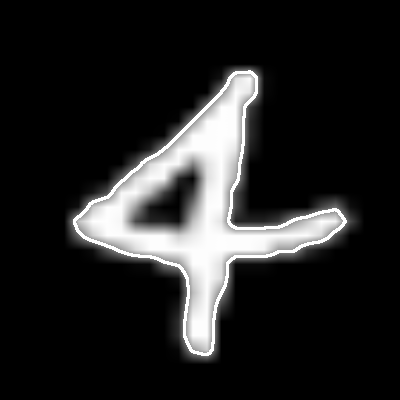

In [ ]:
# Plot the resized image with its boundary contour
resized_image_with_contour = cv2.drawContours(resized_image.copy(), contours, -1, (255, 100, 255), 2)
# Display the resized image with its boundary contour
cv2_imshow(resized_image_with_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Extract chain code from contour using 8-connectivity


In [ ]:
def extract_chain_code(contour):
    chain_code = []
    directions = [(0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]   # 8 Connectivity

    for i in range(len(contour) - 1):
        dx = contour[i+1][0][0] - contour[i][0][0]
        dy = contour[i+1][0][1] - contour[i][0][1]

        # Normalize dx and dy to be in range [-1, 1]
        dx_normalized = np.sign(dx)
        dy_normalized = np.sign(dy)

        direction = directions.index((dx_normalized, dy_normalized))
        chain_code.append(direction)

    return chain_code

#Calculate chain code

In [ ]:
def calculate_chain_code_dimensions(image):
    # Threshold the image
    _, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea) # processing the most significant part of the image

    # Get chain code sequence for the largest contour
    chain_code_sequence = extract_chain_code(largest_contour)

    return chain_code_sequence

In [ ]:
# Calculate chain code dimensions for all images
chain_code_sequences = []
for image in X:
    sequence = calculate_chain_code_dimensions(image)
    chain_code_sequences.append(sequence)

In [ ]:
# Pad chain codes with zeros to make them uniform
max_length = max(len(code) for code in chain_code_sequences)
chain_codes_padded = [code + [8] * (max_length - len(code)) for code in chain_code_sequences]

In [ ]:
# Convert chain codes to NumPy array
X = np.array(chain_codes_padded)
# Print the shape of chain code dimensions
print("Shape of chain code dimensions:", X.shape)

Shape of chain code dimensions: (70000, 73)


In [ ]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest classifier

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8518857142857142
